<a href="https://colab.research.google.com/github/FaithOIgwe/Twitter-Sentiment-Analysis-in-Python/blob/main/Bill_Gates_Twitter_Sentiment_Analysis___.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Introduction**

I carried out a twitter sentiment analysis of 1000 of **Bill Gates Tweets in 2022**. William Henry Gates III (born October 28, 1955) is an American business magnate, software developer, investor, author, and philanthropist. He is a **co-founder of Microsoft**, along with his late childhood friend Paul Allen. During his career at Microsoft, Gates held the positions of chairman, chief executive officer (CEO), president and chief software architect, while also being the largest individual shareholder until May 2014.[4] He was a major entrepreneur of the microcomputer revolution of the 1970s and 1980s. He is one of the first individuals to shape the world of technology and it was such an honor to be able to mine his tweets to determine the polarity and subjectivity of his tweets if his tweets are centered around negative or positive sentiments.

I used the **Google Colaboratory as my IDE**, I also applied for Twitter Developper Account(API) to, be granted the permission to scrape this tweets and lastly I used Tweepy to access, the Twitter API in Python.

Let's find out what Bill Gates Tweets about.

**Table of content**
1. [Import the necessary libraries](https://)

2. [Autheticate the user credentials](https://)

3. [User Authentication](https://)

4. [Import the Tweets](https://)

5. [Clean Tweets](https://)

6. [Create a wordcloud using Tweets to find the most common words](https://)

7. [The Polarity and Subjectivity of His Tweets](https://)

8. [The percentage of Negative and Positive Tweets](https://)

9. [Scatter Plots showing the negative and positive tweets](https://)

10. [A bar chart Showing the type of tweets](https://)

11. findings and insights

In [1]:
#Description : This is a sentiment analysis program that parses the tweets fetched from Twitter using Python
#importing libraries 

import tweepy
from textblob import TextBlob
from wordcloud import wordcloud
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
plt.style.use('fivethirtyeight')

In [2]:
#variables that contain the user credentiaals to access Twitter API

consumer_key= os.environ.get('consumer_key')
consumer_secret= os.environ.get('consumer_secret')
access_token= os.environ.get('access_token')
access_token_secret= os.environ.get('acccess_token_secret')

In [ ]:
from tweepy.auth import OAuthHandler

#create the authentication object
authenticate = OAuthHandler(consumer_key, consumer_secret)

#set the access token and access token secret
authenticate.set_access_token(access_token, access_token_secret)

#Create the API object while passing in the authentication information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
#Exract 1000 tweets from the twitter user
posts = api.user_timeline(screen_name ="BillGates", count=1000, lang = "en", tweet_mode="extended")

#print the last 5 tweets from the account
print("show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i + 1


show the 5 recent tweets: 

1) The @Breakthrough Fellows program supports brilliant scientists working on early-stage climate technologies. Last week, I got to meet the second cohort of fellows and learn about the work they're doing to help the world achieve net-zero emissions. https://t.co/vFJBMQn06R

2) This #WorldTeachersDay, I’m thinking about Mrs. Caffiere. She was the school librarian at Seattle’s View Ridge Elementary. When I was 9 years old, she took me under her wing and taught me that my love of reading was a strength. To this day, I think about how she changed my life. https://t.co/oucGBP7n0L

3) After my visit to the @stanforddoerr school of sustainability, I’m even more optimistic that we can develop breakthroughs that will transform our global economy, our lives, and our planet for the better: https://t.co/aILfplXPZQ https://t.co/UzcAj4cTNx

4) I was truly lucky to know Ric Weiland. He was an incredible programmer and an exceptional individual. https://t.co/tkkrpwVUwk

5)

In [ ]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

#show the first 5 rows of data
df.head()

,Tweets
0,The @Breakthrough Fellows program supports bri...
1,"This #WorldTeachersDay, I’m thinking about Mrs..."
2,After my visit to the @stanforddoerr school of...
3,I was truly lucky to know Ric Weiland. He was ...
4,"Over the years, I’ve come to know Bono as an i..."


In [ ]:
#Clean the text
#Create a function to clean the tweets
def clean(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removes @mentions
  text = re.sub(r'#', '', text) #Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlink

  return text

  #Cleaning the text
  df['Tweets']= df['Tweets'].apply(cleanTxt)
  
  #Show the Cleaned Text
  print(df)

In [ ]:
#Creata a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
print(df)


                                                Tweets  Subjectivity  Polarity
0    The @Breakthrough Fellows program supports bri...      0.355556  0.300000
1    This #WorldTeachersDay, I’m thinking about Mrs...      0.566667  0.300000
2    After my visit to the @stanforddoerr school of...      0.333333  0.333333
3    I was truly lucky to know Ric Weiland. He was ...      0.783333  0.475000
4    Over the years, I’ve come to know Bono as an i...      0.591667  0.425000
..                                                 ...           ...       ...
195  I have appreciated our conversations over the ...      0.100000  0.200000
196  It was an honor to speak (virtually) at the #G...      0.050000  0.050000
197  Bono, you’re just as amazing a philanthropist ...      0.950000  0.800000
198  I can't wait to read this. https://t.co/5ErEXh...      0.000000  0.000000
199  We will continue working with partners and do ...      0.000000  0.000000

[200 rows x 3 columns]


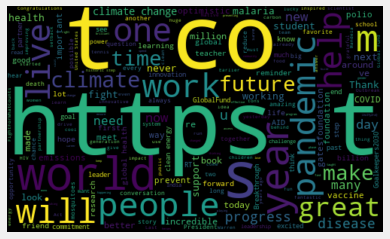

In [ ]:
#Plot Word Cloud
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud  = WordCloud(width=500, height=300, random_state = 21, max_font_size = 119).generate(allwords) 

#show the wordCloud and interpolation is billinear
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative, neutral and positive analysis 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,The @Breakthrough Fellows program supports bri...,0.355556,0.300000,Positive
1,"This #WorldTeachersDay, I’m thinking about Mrs...",0.566667,0.300000,Positive
2,After my visit to the @stanforddoerr school of...,0.333333,0.333333,Positive
3,I was truly lucky to know Ric Weiland. He was ...,0.783333,0.475000,Positive
4,"Over the years, I’ve come to know Bono as an i...",0.591667,0.425000,Positive
...,...,...,...,...
195,I have appreciated our conversations over the ...,0.100000,0.200000,Positive
196,It was an honor to speak (virtually) at the #G...,0.050000,0.050000,Positive
197,"Bono, you’re just as amazing a philanthropist ...",0.950000,0.800000,Positive
198,I can't wait to read this. https://t.co/5ErEXh...,0.000000,0.000000,Neutral


In [ ]:
#Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
      print(str(j) + ') '+sortedDF['Tweets'][i])
      print()
      j = j+1

1) The @Breakthrough Fellows program supports brilliant scientists working on early-stage climate technologies. Last week, I got to meet the second cohort of fellows and learn about the work they're doing to help the world achieve net-zero emissions. https://t.co/vFJBMQn06R

2) This #WorldTeachersDay, I’m thinking about Mrs. Caffiere. She was the school librarian at Seattle’s View Ridge Elementary. When I was 9 years old, she took me under her wing and taught me that my love of reading was a strength. To this day, I think about how she changed my life. https://t.co/oucGBP7n0L

3) After my visit to the @stanforddoerr school of sustainability, I’m even more optimistic that we can develop breakthroughs that will transform our global economy, our lives, and our planet for the better: https://t.co/aILfplXPZQ https://t.co/UzcAj4cTNx

4) I was truly lucky to know Ric Weiland. He was an incredible programmer and an exceptional individual. https://t.co/tkkrpwVUwk

5) Over the years, I’ve come t

In [ ]:
#Print the negative tweets
j= 1 
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])


1)The world can end this pandemic while also preventing the next. As @edyong209 shares, "such changes seem unrealistic given the relentless disappointments of the past three years, but substantial social progress always seems unfeasible until it is actually achieved." https://t.co/Y0l1vcYbfl
1)RT @JMDBarroso: Amidst backsliding on the #SDGs in the past two years, this interview with @BillGates is an optimistic reminder that the mo…
1)I feel honored to have met HM Queen Elizabeth, and I am very sad to hear of her passing. My deepest condolences to the Royal Family and the British people. https://t.co/fPbpAt5ILv
1)Summer’s almost over. If you have time to sneak  in another book or two – here are a few I recommend. https://t.co/dA8NvE354P
1)In the past 16 years the world has made immense strides in protecting children from life-threatening diarrhea. Today, I congratulate Nigeria on introducing this vaccine, which will protect generations of Nigerian children. https://t.co/3Z2UK38bqo
1)Yea

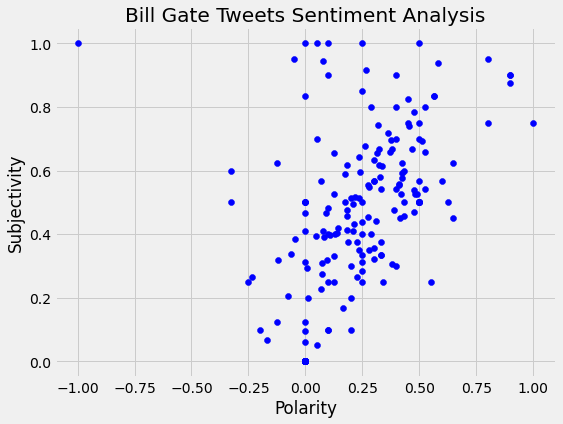

In [ ]:
#Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter (df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Bill Gate Tweets Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#Get the percentage of positive tweets
#Trying out another way to print out the positive tweest instead of using the for loop 
positive_tweets = df[df.Analysis == 'Positive']
positive_tweets = positive_tweets['Tweets']

#To show the tweets
round((positive_tweets.shape[0] / df.shape[0])* 100, 1)


72.5

In [ ]:
 #Checking Negative Tweets %

negative_tweets = df[df.Analysis == 'Negative']
negative_tweets = negative_tweets['Tweets']
round((negative_tweets.shape[0]) / df.shape[0] * 100, 1)

7.0

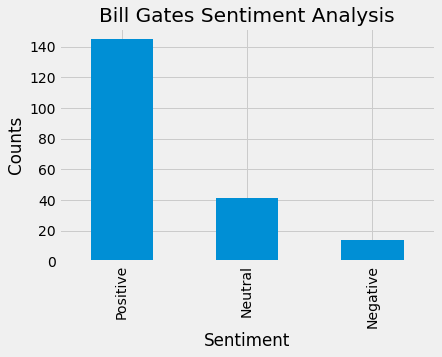

In [ ]:
#Show the value_counts
df['Analysis'].value_counts()

#Plot and visualaize teh counts
plt.title('Bill Gates Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

Findings and insights

This project has analyzed the written communication form used by Bill Gates on his Twitter posts in 2022. The first obvious result was Bill’s tendency to post his own tweets. He doesn’t tend to retweet other users’ tweets. He also likes to use URLs alot in his tweets.

In terms of the choice between small and big words, Bill tends to explain his thoughts in a simpler way by using small words more frequently than big words.

From the usage of grammatical categories, Bill was found to choose an action-focused and good explication language on Twitter.

Sentiment Analysis detected that Bill prefers to express positive opinions and avoid distributing negative signals on his Twitter account.

There is still so much insights I would to dive into using Bill Gates Twitter Handle and I hope to do that in the near future.

Thank you for following this project to the end, and I will be sure to update this project in the near future, as Twitter allows us to mine as much data as we can through tweets.
